# Class 14: Backpropagation and Activation Functions

## Preliminaries

Run the cell below to download the course library.

In [ ]:
from urllib.request import urlretrieve

urlretrieve('https://drive.google.com/uc?export=download&id=1SiLnO91qJWKomBkGhKciJSG9Hcd_zRp7', 'sdx.zip')
!unzip -o 'sdx.zip'
!rm 'sdx.zip'

Archive:  sdx.zip
  inflating: sdx.py                  


Run the cell below to import the class modules.

If you get import warnings, try using **`Ctrl+M .`** to restart the kernel. *(notice there is a dot there)*

In [ ]:
from tensorflow import keras
from sdx import *

## Loading the training and testing data

We will now switch to the [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset.

In [ ]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

This dataset consists of 50000 training images and 10000 testing images. Each image has $32$ pixels of height, $32$ pixels of width, and $3$ color channels, giving a $32 \times 32 \times 3 = 3072$ tensor. The set is divided evenly in ten categories:

* `[0]:` airplane
* `[1]:` automobile
* `[2]:` bird
* `[3]:` cat
* `[4]:` deer
* `[5]:` dog
* `[6]:` frog
* `[7]:` horse
* `[8]:` ship
* `[9]:` truck

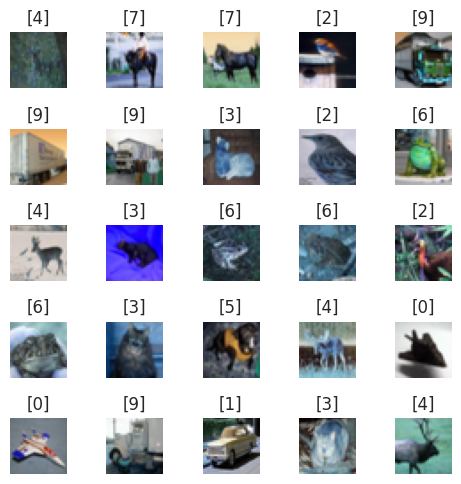

In [ ]:
cv_gridshow(train_images, start=10, stop=35, labels=train_labels)

## Convenience functions

Since we will use the same training parameters for all networks, we will define some functions to avoid repetition.

In [ ]:
def compile_and_summary(model):
    model.compile(
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[keras.metrics.SparseCategoricalAccuracy()],
    )
    model.summary()

In [ ]:
def fit_default_parameters(model):
    history = model.fit(
        train_images, train_labels,
        epochs=32,
        batch_size=32,
        validation_data=(test_images, test_labels),
    )
    return history

## No activation function

In [ ]:
model = keras.Sequential([
    keras.layers.Input(shape=(32, 32, 3)),
    keras.layers.Conv2D(16, (3, 3)),
    keras.layers.Conv2D(32, (3, 3)),
    keras.layers.Conv2D(128, (3, 3)),
    keras.layers.Flatten(),
    keras.layers.Dense(10),
])

compile_and_summary(model)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 128)       36992     
                                                                 
 flatten (Flatten)           (None, 86528)             0         
                                                                 
 dense (Dense)               (None, 10)                865290    
                                                                 
Total params: 907370 (3.46 MB)
Trainable params: 907370 (3.46 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/32
1563/1563 [==============================] - 11s 6ms/step - loss: 44.0155 - sparse_categorical_accuracy: 0.1919 - val_loss: 5.7325 - val_sparse_categorical_accuracy: 0.1793
Epoch 2/32
1563/1563 [==============================] - 9s 6ms/step - loss: 13.7707 - sparse_categorical_accuracy: 0.2245 - val_loss: 3.1776 - val_sparse_categorical_accuracy: 0.2563
Epoch 3/32
1563/1563 [==============================] - 9s 5ms/step - loss: 14.9132 - sparse_categorical_accuracy: 0.2300 - val_loss: 3.1753 - val_sparse_categorical_accuracy: 0.2556
Epoch 4/32
1563/1563 [==============================] - 8s 5ms/step - loss: 15.3124 - sparse_categorical_accuracy: 0.2366 - val_loss: 2.8345 - val_sparse_categorical_accuracy: 0.2288
Epoch 5/32
1563/1563 [==============================] - 9s 6ms/step - loss: 16.2418 - sparse_categorical_accuracy: 0.2389 - val_loss: 35.3063 - val_sparse_categorical_accuracy: 0.1040
Epoch 6/32
1563/1563 [==============================] - 9s 6ms/step - loss: 15.6620

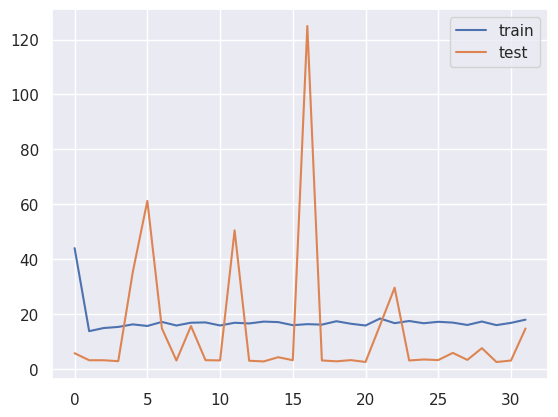

In [ ]:
history = fit_default_parameters(model)

plot_loss(history)

313/313 [==============================] - 1s 2ms/step


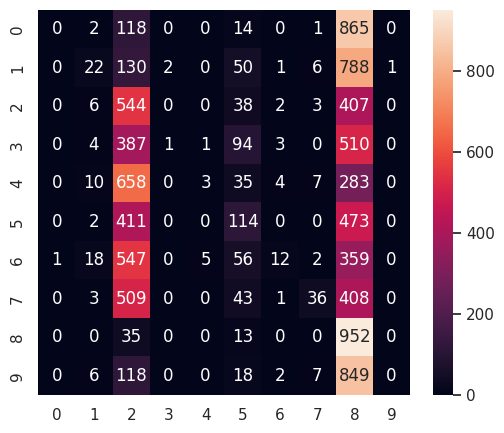

In [ ]:
plot_confusion(model, test_images, test_labels)

## Sigmoid activation function

In [ ]:
model = keras.Sequential([
    keras.layers.Input(shape=(32, 32, 3)),
    keras.layers.Conv2D(16, (3, 3), activation='sigmoid'),
    keras.layers.Conv2D(32, (3, 3), activation='sigmoid'),
    keras.layers.Conv2D(128, (3, 3), activation='sigmoid'),
    keras.layers.Flatten(),
    keras.layers.Dense(10),
])

compile_and_summary(model)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 26, 128)       36992     
                                                                 
 flatten_1 (Flatten)         (None, 86528)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                865290    
                                                                 
Total params: 907370 (3.46 MB)
Trainable params: 907370 (3.46 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/32
1563/1563 [==============================] - 10s 6ms/step - loss: 2.3278 - sparse_categorical_accuracy: 0.2426 - val_loss: 1.9502 - val_sparse_categorical_accuracy: 0.3060
Epoch 2/32
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7673 - sparse_categorical_accuracy: 0.3705 - val_loss: 1.6061 - val_sparse_categorical_accuracy: 0.4204
Epoch 3/32
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5520 - sparse_categorical_accuracy: 0.4473 - val_loss: 1.5106 - val_sparse_categorical_accuracy: 0.4463
Epoch 4/32
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4690 - sparse_categorical_accuracy: 0.4802 - val_loss: 1.4426 - val_sparse_categorical_accuracy: 0.4788
Epoch 5/32
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3975 - sparse_categorical_accuracy: 0.5053 - val_loss: 1.3553 - val_sparse_categorical_accuracy: 0.5167
Epoch 6/32
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3162 - spar

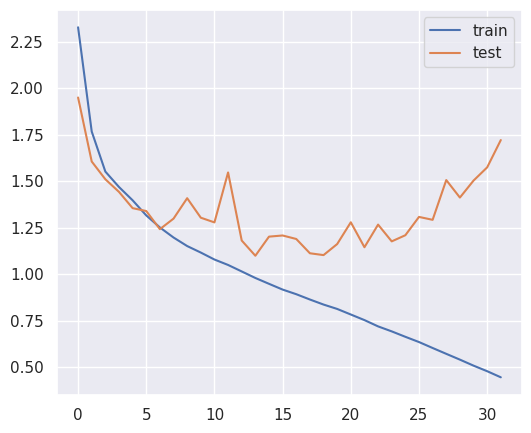

In [ ]:
history = fit_default_parameters(model)

plot_loss(history)

313/313 [==============================] - 1s 2ms/step


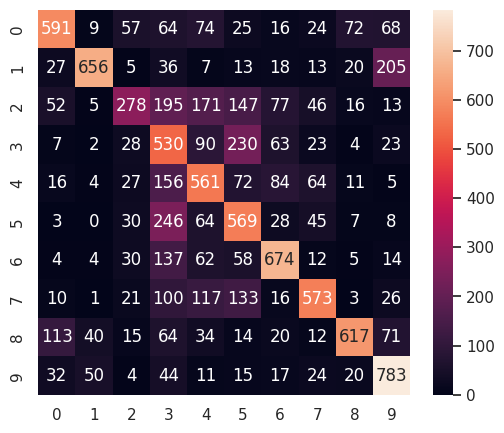

In [ ]:
plot_confusion(model, test_images, test_labels)

## Hyperbolic tangent activation function

In [ ]:
model = keras.Sequential([
    keras.layers.Input(shape=(32, 32, 3)),
    keras.layers.Conv2D(16, (3, 3), activation='tanh'),
    keras.layers.Conv2D(32, (3, 3), activation='tanh'),
    keras.layers.Conv2D(128, (3, 3), activation='tanh'),
    keras.layers.Flatten(),
    keras.layers.Dense(10),
])

compile_and_summary(model)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 conv2d_8 (Conv2D)           (None, 26, 26, 128)       36992     
                                                                 
 flatten_2 (Flatten)         (None, 86528)             0         
                                                                 
 dense_2 (Dense)             (None, 10)                865290    
                                                                 
Total params: 907370 (3.46 MB)
Trainable params: 907370 (3.46 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/32
1563/1563 [==============================] - 10s 6ms/step - loss: 2.8375 - sparse_categorical_accuracy: 0.2802 - val_loss: 2.3440 - val_sparse_categorical_accuracy: 0.3227
Epoch 2/32
1563/1563 [==============================] - 9s 6ms/step - loss: 2.2361 - sparse_categorical_accuracy: 0.3491 - val_loss: 4.9946 - val_sparse_categorical_accuracy: 0.2605
Epoch 3/32
1563/1563 [==============================] - 9s 5ms/step - loss: 2.1466 - sparse_categorical_accuracy: 0.3845 - val_loss: 2.4591 - val_sparse_categorical_accuracy: 0.3165
Epoch 4/32
1563/1563 [==============================] - 9s 6ms/step - loss: 2.0916 - sparse_categorical_accuracy: 0.4072 - val_loss: 2.4947 - val_sparse_categorical_accuracy: 0.3234
Epoch 5/32
1563/1563 [==============================] - 9s 6ms/step - loss: 1.9949 - sparse_categorical_accuracy: 0.4216 - val_loss: 1.9771 - val_sparse_categorical_accuracy: 0.3834
Epoch 6/32
1563/1563 [==============================] - 9s 6ms/step - loss: 1.9901 - spar

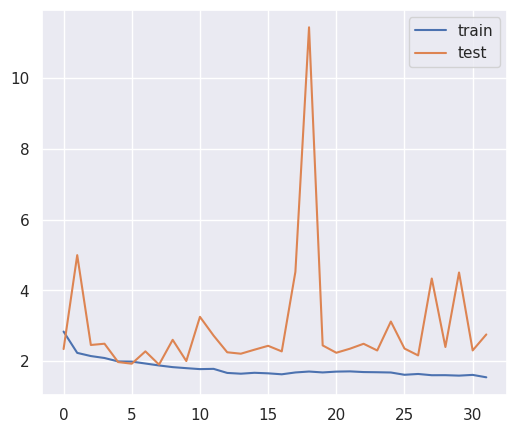

In [ ]:
history = fit_default_parameters(model)

plot_loss(history)

313/313 [==============================] - 1s 2ms/step


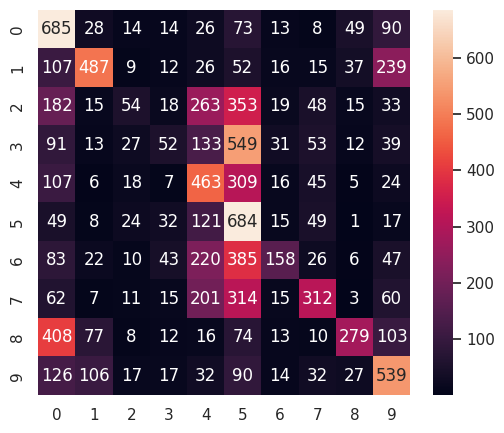

In [ ]:
plot_confusion(model, test_images, test_labels)

## Rectified linear unit activation function

In [ ]:
model = keras.Sequential([
    keras.layers.Input(shape=(32, 32, 3)),
    keras.layers.Conv2D(16, (3, 3), activation='relu'),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(10),
])

compile_and_summary(model)

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_66 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 conv2d_67 (Conv2D)          (None, 28, 28, 32)        4640      
                                                                 
 conv2d_68 (Conv2D)          (None, 26, 26, 128)       36992     
                                                                 
 flatten_24 (Flatten)        (None, 86528)             0         
                                                                 
 dense_26 (Dense)            (None, 10)                865290    
                                                                 
Total params: 907370 (3.46 MB)
Trainable params: 907370 (3.46 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/32
1563/1563 [==============================] - 11s 6ms/step - loss: 3.9057 - sparse_categorical_accuracy: 0.3389 - val_loss: 1.4456 - val_sparse_categorical_accuracy: 0.4976
Epoch 2/32
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2052 - sparse_categorical_accuracy: 0.5921 - val_loss: 1.2546 - val_sparse_categorical_accuracy: 0.5701
Epoch 3/32
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9421 - sparse_categorical_accuracy: 0.6854 - val_loss: 1.2305 - val_sparse_categorical_accuracy: 0.6078
Epoch 4/32
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7272 - sparse_categorical_accuracy: 0.7594 - val_loss: 1.3504 - val_sparse_categorical_accuracy: 0.5934
Epoch 5/32
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5417 - sparse_categorical_accuracy: 0.8266 - val_loss: 1.7052 - val_sparse_categorical_accuracy: 0.5619
Epoch 6/32
1563/1563 [==============================] - 9s 5ms/step - loss: 0.3914 - spar

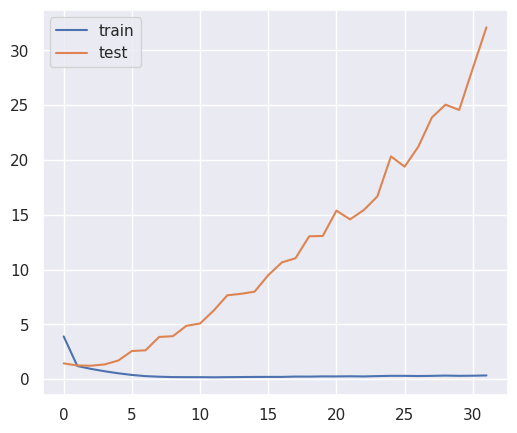

In [ ]:
history = fit_default_parameters(model)

plot_loss(history)

313/313 [==============================] - 1s 2ms/step


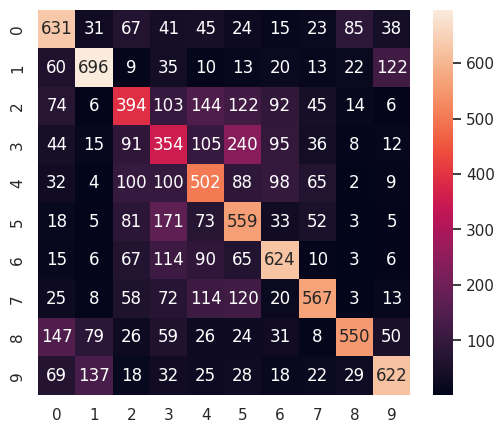

In [ ]:
plot_confusion(model, test_images, test_labels)

You can click on the toc.png tab to the left to browse by section.